In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel("données_libération.xlsx")

chaque séries d'expériences sont stockées dans leurs variables respectives

In [9]:
Toposar_df = df[df["Formulation"] == "Toposar"].reset_index(drop=True)
Toposar_df_exp_1 = Toposar_df[Toposar_df["Expérience"] == 1].reset_index(drop=True)
Toposar_df_exp_2 = Toposar_df[Toposar_df["Expérience"] == 2].reset_index(drop=True)

In [10]:
NC_df = df[df["Formulation"] == "NC"].reset_index(drop=True)
NC_df_exp_1 = NC_df[NC_df["Expérience"] == 1].reset_index(drop=True)
NC_df_exp_2 = NC_df[NC_df["Expérience"] == 2].reset_index(drop=True)

In [11]:
serie_temps = NC_df_exp_1["Temps"]

Voici un graphe traçant les valeurs de fraction libérée de chaque série en fonction du temps

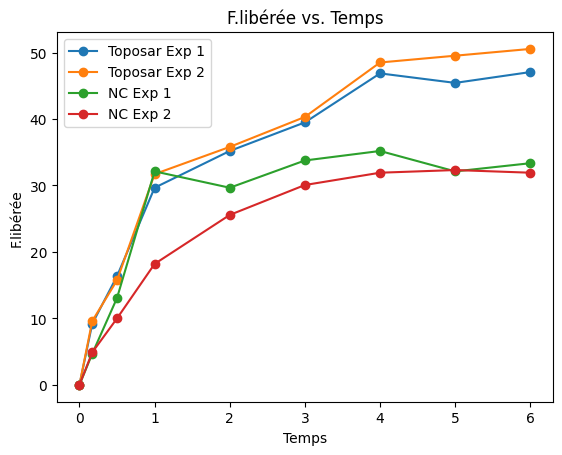

In [12]:

plt.plot(serie_temps, Toposar_df_exp_1["F.libérée"], label='Toposar Exp 1', marker='o')
plt.plot(serie_temps, Toposar_df_exp_2["F.libérée"], label='Toposar Exp 2', marker='o')
plt.plot(serie_temps, NC_df_exp_1["F.libérée"], label='NC Exp 1', marker='o')
plt.plot(serie_temps, NC_df_exp_2["F.libérée"], label='NC Exp 2', marker='o')


plt.title('F.libérée vs. Temps')
plt.xlabel('Temps')
plt.ylabel('F.libérée')


plt.legend()

plt.show()

cette fonction nous permet de trouver les paramètres d'une fonction décrivant une distribution monocompartimentale

In [13]:
import numpy as np
from scipy.optimize import curve_fit

def monocomp_function(t, A, B, k):
    return A + B * np.exp(-k * t)

popt, pcov = curve_fit(monocomp_function, serie_temps, NC_df_exp_2["F.libérée"], p0=[max(NC_df_exp_1["F.libérée"]), 1, 0.1], maxfev=10000)

c:\Users\lukam\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


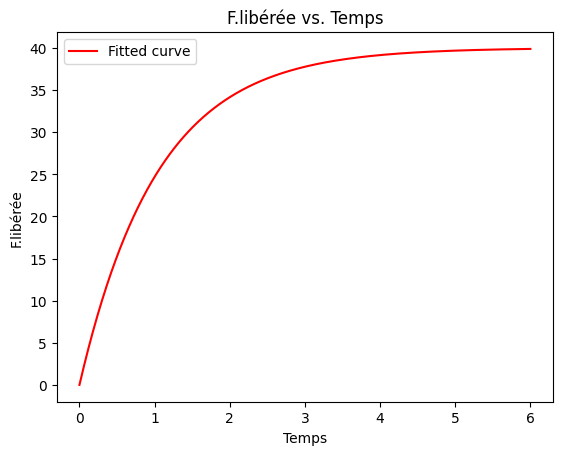

In [14]:
import numpy as np
from scipy.optimize import curve_fit

fit_results = {}

def monocomp_function(t, A, B, k):
    return A - A * np.exp(-k * t)

popt, pcov = curve_fit(monocomp_function, df["Temps"], df["F.libérée"], p0=[max(df["F.libérée"]), 1, 0.1], maxfev=10000)
fit_results["formulation"] = {'params': popt, 'covariance': pcov}
time_values = np.linspace(min(df["Temps"]), max(df["Temps"]), 500)
plt.plot(time_values, monocomp_function(time_values, *popt), label='Fitted curve', color='red')
plt.title('F.libérée vs. Temps')
plt.xlabel('Temps')
plt.ylabel('F.libérée')

# Show legend
plt.legend()

# Display the plot
plt.show()

nous pouvons donc modéliser une fonction approximant les valeurs de nos séries, ci-dessous la série de la 2ème expérience avec la forme des nanocristaux

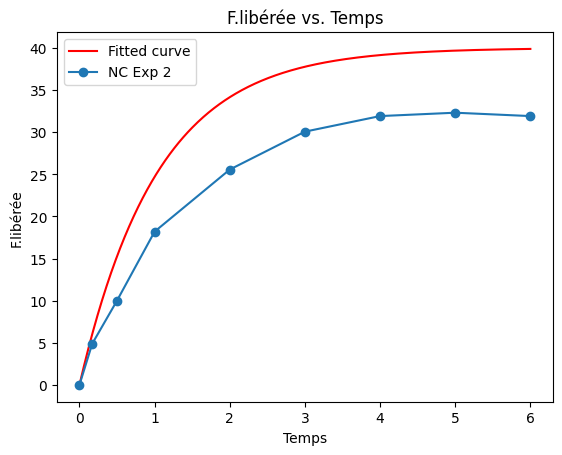

In [15]:
time_values = np.linspace(min(serie_temps), max(serie_temps), 500)
plt.plot(time_values, monocomp_function(time_values, *popt), label='Fitted curve', color='red')
plt.plot(serie_temps, NC_df_exp_2["F.libérée"], label='NC Exp 2', marker='o')
plt.title('F.libérée vs. Temps')
plt.xlabel('Temps')
plt.ylabel('F.libérée')

# Show legend
plt.legend()

# Display the plot
plt.show()

nous pouvons ainsi en déduire les paramètres de la fonction approximant cette série

In [16]:
A, B, k = popt
print("A: ", A,
"B: ", B,
"k: ", k)


A:  40.018803087900054 B:  1.0 k:  0.9607002786263799


voici traçées les fonctions approximant les valeurs de chaque série

NC 1 A : 33.82227207517022 k:  1.417559635823027
NC 2 A : 32.82063209176497 k:  0.7877818650782807
Toposar 1 A : 45.85617809781237 k:  0.895415514819639
Toposar 2 A : 49.060461194940295 k:  0.8144150949498054


c:\Users\lukam\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


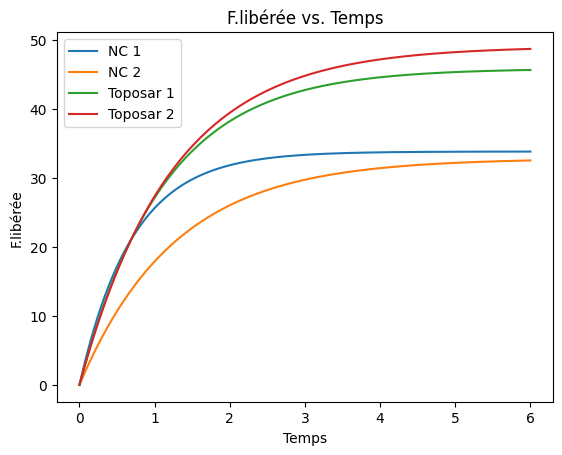

In [30]:
def plot_func(temps, f_lib, name):
    def monocomp_function(t, A, B, k):
        return A - A * np.exp(-k * t)
    popt, pcov = curve_fit(monocomp_function, temps, f_lib, p0=[max(f_lib), 1, 0.1], maxfev=10000)
    time_values = np.linspace(min(temps), max(temps), 500)
    plt.plot(time_values, monocomp_function(time_values, *popt), label=name)
    #plt.plot(temps, f_lib, label='NC Exp 2', marker='o')
    A, B, k = popt
    print(name,"A :", A, "k: ", k)
plot_func(serie_temps, NC_df_exp_1["F.libérée"], "NC 1")
plot_func(serie_temps, NC_df_exp_2["F.libérée"], "NC 2")
plot_func(serie_temps, Toposar_df_exp_1["F.libérée"], "Toposar 1")
plot_func(serie_temps, Toposar_df_exp_2["F.libérée"], "Toposar 2")
plt.title('F.libérée vs. Temps')
plt.xlabel('Temps')
plt.ylabel('F.libérée')
plt.legend()

In [18]:
def find_func(temps, f_lib, name):
    def monocomp_function(t, A, B, k):
        return A + B * np.exp(-k * t)
    popt, pcov = curve_fit(monocomp_function, temps, f_lib, p0=[max(f_lib), 1, 0.1], maxfev=10000)
    A, B, k = popt
    return round(A, 2), round(B, 2), round(k, 2)

A, B, k = find_func(serie_temps, NC_df_exp_1["F.libérée"], "NC 1")

Afin de pouvoir comparer les 2 formes, nous allons créer une série pour chaque formule, dont les valeurs seront la moyenne des 2 séries d'expérience :

In [19]:
NC_df_avg = (NC_df_exp_1["F.libérée"] + NC_df_exp_2["F.libérée"])/2
Toposar_df_avg = (Toposar_df_exp_1["F.libérée"] + Toposar_df_exp_2["F.libérée"])/2

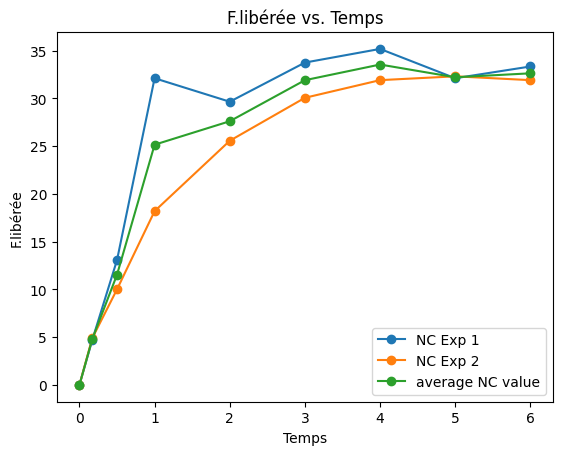

In [20]:
plt.plot(serie_temps, NC_df_exp_1["F.libérée"], label='NC Exp 1', marker='o')
plt.plot(serie_temps, NC_df_exp_2["F.libérée"], label='NC Exp 2', marker='o')
plt.plot( serie_temps, NC_df_avg, label='average NC value', marker='o')
# Adding title and labels
plt.title('F.libérée vs. Temps')
plt.xlabel('Temps')
plt.ylabel('F.libérée')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [21]:
from IPython.display import display, Latex
A, B, k = find_func(serie_temps, NC_df_avg, "")
latex_str = f"$$f(t) = {A} {B} \cdot e^{{-{k} \cdot t}}$$"
# Display the LaTeX string
display(Latex(latex_str))

<IPython.core.display.Latex object>

nous allons calculer le temps auquel la moitié de F.libérée maximale est atteinte pour la forme des nanocristaux

In [22]:
%%latex
\begin{align*}
    32.86 - 33.6 \cdot e^{-1.13t} &= \frac{32.86}{2} \\
    \\
    33.6 \cdot e^{-1.13t} &= 32.86 \cdot \frac{1}{2} \\
    \\
    e^{-1.13t} &= \frac{32.86}{33.6 \cdot 2} \\
    \\
    -1.13t &= \ln\left(\frac{32.86}{33.6 \cdot 2}\right) \\
    \\
    t &= 0.63 \\
\end{align*}

<IPython.core.display.Latex object>

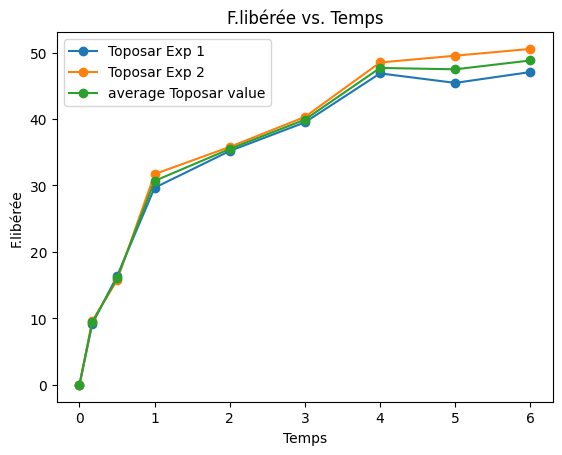

In [23]:
plt.plot(serie_temps, Toposar_df_exp_1["F.libérée"], label='Toposar Exp 1', marker='o')
plt.plot(serie_temps, Toposar_df_exp_2["F.libérée"], label='Toposar Exp 2', marker='o')
plt.plot(serie_temps,Toposar_df_avg, label='average Toposar value', marker='o')
# Adding title and labels
plt.title('F.libérée vs. Temps')
plt.xlabel('Temps')
plt.ylabel('F.libérée')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [24]:
A, B, k = find_func(serie_temps, Toposar_df_avg, "")

latex_str = f"$$f(t) = {A} {B} \cdot e^{{-{k} \cdot t}}$$"
# Display the LaTeX string
display(Latex(latex_str))

<IPython.core.display.Latex object>

nous allons calculer le temps auquel la moitié de F.libérée maximale est atteinte pour la forme des Toposar

In [25]:
%%latex
\begin{align*}
    47.97 - 46.01 \cdot e^{-0.78t} &= \frac{47.97}{2} \\
    \\
    46.01 \cdot e^{-0.78t} &= 47.97 \cdot \frac{1}{2} \\
    \\
    e^{-0.78t} &= \frac{47.97}{46.01 \cdot 2} \\
    \\
    -0.78t &= \ln\left(\frac{47.97}{46.01 \cdot 2}\right) \\
    \\
    t &= 0.84 \\
\end{align*}

<IPython.core.display.Latex object>

In [26]:
%%latex
ainsi :
\begin{align}
    t_{1/2_{Toposar}}  > t_{1/2_{NC}} \\
\end{align}


<IPython.core.display.Latex object>

In [27]:
# Define a function to calculate standard deviation for a sample of size 2
def std_calc(x1, x2):
    mean = (x1 + x2) / 2
    std = ((x1 - mean)**2 + (x2 - mean)**2) / 1
    std = std**0.5
    return std

In [28]:
from scipy import stats

mean1, std1, n1 = 32.86, std_calc(33.73, 32.86), 2

mean2, std2, n2 = 47.97, std_calc(46.27, 49.75), 2

t_statistic, p_value = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -8.42462826275631, P-value: 0.013798644272206265


In [29]:
from scipy import stats

mean1, std1, n1 = 1.13, std_calc(1.51,  0.78), 2

mean2, std2, n2 = 0.78, std_calc(0.73, 0.82), 2

t_statistic, p_value = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 0.9516985496416488, P-value: 0.4416946761801408
